In [92]:
%pip install --upgrade --quiet  langchain langchain-community langchain-openai langchain-experimental neo4j wikipedia tiktoken yfiles_jupyter_graphs

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
%pip install --upgrade --quiet  langchain langchain-community langchain-groq neo4j

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Start

In [86]:
from langchain_core.runnables import (
    RunnableBranch,
    RunnableLambda,
    RunnableParallel,
    RunnablePassthrough,
)
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate
from typing import Tuple, List, Optional
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import ConfigurableField
from yfiles_jupyter_graphs import GraphWidget
from neo4j import GraphDatabase

from langchain_community.vectorstores import Neo4jVector
from dotenv import load_dotenv
load_dotenv()
import os


In [9]:
# os.environ["OPENAI_API_KEY_PAPER"] = OPENAI_API_KEY
# OPENAI_API_KEY = os.getenv("OPENAI_API_KEY_PAPER")

NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_USERNAME = os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

# os.environ["NEO4J_URI"] = NEO4J_URI
# os.environ["NEO4J_USERNAME"] = NEO4J_USERNAME
# os.environ["NEO4J_PASSWORD"] = NEO4J_PASSWORD
from langchain_community.graphs import Neo4jGraph
graph = Neo4jGraph()

# Scrape from Wikipedia

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


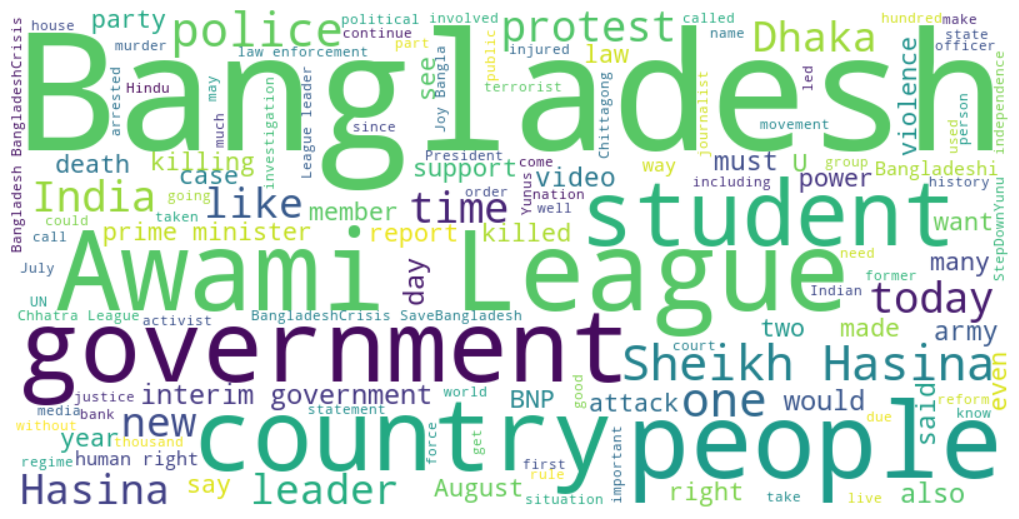

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('stopwords')

def generate_wordcloud_from_excel(excel_file, column_name):
    """
    Generate a word cloud from an Excel column while removing stop words.
    
    Parameters:
    excel_file (str): Path to the Excel file
    column_name (str): Name of the column containing text data
    """
    # Read the Excel file
    df = pd.read_excel(excel_file)
    
    # Combine all text from the column into a single string
    text = ' '.join(df[column_name].astype(str).values)
    
    # Get English stop words
    stop_words = set(stopwords.words('english'))
    
    # Create and configure the WordCloud object
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stop_words,
        min_font_size=10,
        max_font_size=150,
        random_state=42
    )
    
    # Generate the word cloud
    wordcloud.generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
    # Save the word cloud to a file
    wordcloud.to_file('wordcloud.png')

# Example usage
if __name__ == "__main__":
    # Replace these with your actual file path and column name
    excel_file = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx"
    column_name = "translation"
    
    generate_wordcloud_from_excel(excel_file, column_name)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


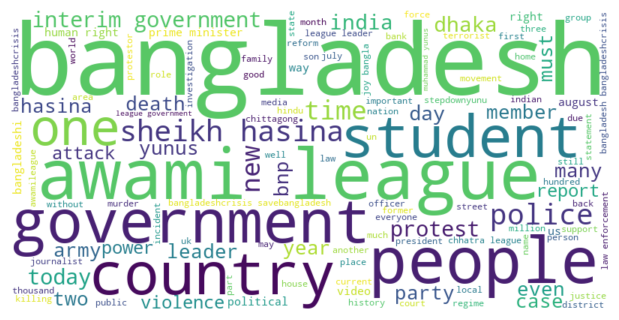

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def remove_verbs_and_stopwords(text):
    """
    Remove verbs and stopwords from the text.
    Returns cleaned text as a single string.
    """
    # Tokenize and tag parts of speech
    tokens = word_tokenize(text.lower())
    tagged = pos_tag(tokens)
    
    # Get stop words
    stop_words = set(stopwords.words('english'))
    
    # Keep words that are not verbs (don't start with 'V') and not stopwords
    cleaned_words = [word for word, tag in tagged 
                    if not tag.startswith('V') 
                    and word.isalnum()
                    and word not in stop_words]
    
    return ' '.join(cleaned_words)

def generate_wordcloud_from_excel(excel_file, column_name):
    """
    Generate a word cloud from an Excel column while removing verbs and stop words.
    
    Parameters:
    excel_file (str): Path to the Excel file
    column_name (str): Name of the column containing text data
    """
    # Read the Excel file
    df = pd.read_excel(excel_file)
    
    # Combine all text from the column into a single string
    text = ' '.join(df[column_name].astype(str).values)
    
    # Clean the text by removing verbs and stopwords
    cleaned_text = remove_verbs_and_stopwords(text)
    
    # Create and configure the WordCloud object
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        random_state=42
    )
    
    # Generate the word cloud
    wordcloud.generate(cleaned_text)
    
    # Display the word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
    # Save the word cloud to a file
    wordcloud.to_file('wordcloud.png')

# Example usage
if __name__ == "__main__":
    # Replace these with your actual file path and column name
    excel_file = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx"
    column_name = "translation"
    
    generate_wordcloud_from_excel(excel_file, column_name)

In [ ]:
from langchain.document_loaders import WikipediaLoader
raw_documents = WikipediaLoader(query="bangladesh student uprising of july 2024").load()
raw_documents

In [6]:
len(raw_documents)

25

In [ ]:
from langchain.text_splitter import TokenTextSplitter
# text_splitter = TokenTextSplitter(chunk_size=512, chunk_overlap=24)
text_splitter = TokenTextSplitter(chunk_size=256, chunk_overlap=50)
documents = text_splitter.split_documents(raw_documents)


print(len(documents))
documents

In [ ]:
import tiktoken

MAX_TOKENS = 20000

def token_count(messages):
    """Calculate the number of tokens in the messages."""
    enc = tiktoken.get_encoding("cl100k_base")  # Use the encoding that matches your model
    total_tokens = 0
    for message in messages:
        total_tokens += len(enc.encode(message))
    return total_tokens


for doc in documents_list:
    print(token_count(str(doc)))

# Groq

In [32]:
# from langchain_groq import ChatGroq

# groq_api_key = os.getenv("groq_api_key")
# # llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")
# # llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.1-8b-instant")
# llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.3-70b-versatile")



# llm


import os
from langchain_mistralai import ChatMistralAI

# Retrieve the API key from environment variables
mistral_api_key = os.getenv("MISTRAL_API_KEY")

# Initialize the LLM instance with the desired model
llm = ChatMistralAI(mistral_api_key=mistral_api_key, model_name="mistral-large-latest", max_retries=50)

llm

ChatMistralAI(client=<httpx.Client object at 0x00000178C9260890>, async_client=<httpx.AsyncClient object at 0x00000178C6B833E0>, mistral_api_key=SecretStr('**********'), endpoint='https://api.mistral.ai/v1', max_retries=50, model='mistral-large-latest')

In [33]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer(llm=llm)

In [ ]:
print(documents[0].page_content)
documents[0].page_content = f'''However in 2021, seven children of freedom fighters, including Ahidul Islam, filed a writ petition in the High Court challenging this decision. Finally, on 5 June 2024, a High Court bench of Justice KM Kamrul Quader and Justice Khizir Hayat declared the decision to scrap the quota system invalid. Immediately after the announcement of the verdict, students started protesting against this verdict in various universities of the country.

The movement became more intense in July, with students staging blockades including the "Bangla Blockade". During this time, police used excessive force to quell the agitation led to clashes and a student named Abu Sayed was shot dead by the police in Rangpur. This incident intensified the movement and increased tension across the country.[29]'''

print(documents[0].page_content)


In [43]:
documents[0]

Document(metadata={'title': "Students–People's uprising (Bangladesh)", 'summary': "The Students–People's uprising, also known as the July Revolution, was a pro-democracy mass uprising in Bangladesh. It began as a quota reform movement in early June 2024, led by the Anti-discrimination Students Movement, after the Bangladesh Supreme Court invalidated the government's 2018 circular regarding job quotas in the public sector. The movement escalated into a full-fledged mass uprising after the government carried out mass killings of protesters, known as the July massacre, by late July. By early August, the movement evolved into a non-cooperation movement, ultimately leading to the ouster of the then-prime minister, Sheikh Hasina, who fled Bangladesh to India. Hasina's ouster triggered a constitutional crisis, leading to the formation of an interim government led by the country's only Nobel laureate, Muhammad Yunus, as the chief adviser.", 'source': 'https://en.wikipedia.org/wiki/Students%E2%

In [44]:
graph_documents = llm_transformer.convert_to_graph_documents([documents[0]])
graph_documents

[GraphDocument(nodes=[Node(id='Ahidul Islam', type='Person', properties={}), Node(id='Writ Petition', type='Event', properties={}), Node(id='High Court', type='Organization', properties={}), Node(id='K M Kamrul Quader', type='Person', properties={}), Node(id='Khizir Hayat', type='Person', properties={}), Node(id='Quota System', type='Concept', properties={}), Node(id='Students', type='Group', properties={}), Node(id='Universities', type='Organization', properties={}), Node(id='Bangla Blockade', type='Event', properties={}), Node(id='Police', type='Organization', properties={}), Node(id='Abu Sayed', type='Person', properties={}), Node(id='Rangpur', type='Location', properties={})], relationships=[Relationship(source=Node(id='Ahidul Islam', type='Person', properties={}), target=Node(id='Writ Petition', type='Event', properties={}), type='FILED', properties={}), Relationship(source=Node(id='Ahidul Islam', type='Person', properties={}), target=Node(id='High Court', type='Organization', pro

In [ ]:

#   Nodes Table
# Node ID	Type	Properties
# Ahidul Islam	Person	N/A
# Writ Petition	Event	N/A
# High Court	Organization	N/A
# K M Kamrul Quader	Person	N/A
# Khizir Hayat	Person	N/A
# Quota System	Concept	N/A
# Students	Group	N/A
# Universities	Organization	N/A
# Bangla Blockade	Event	N/A
# Police	Organization	N/A
# Abu Sayed	Person	N/A
# Rangpur	Location	N/A

# Relationships Table
# Source Node	Relationship Type	Target Node	Properties
# Ahidul Islam	FILED	Writ Petition	N/A
# Ahidul Islam	FILED	High Court	N/A
# K M Kamrul Quader	DECLARED	High Court	N/A
# Khizir Hayat	DECLARED	High Court	N/A
# High Court	DECLARED	Quota System	N/A
# Students	PROTESTED	Universities	N/A
# Students	STAGED	Bangla Blockade	N/A
# Police	USED_FORCE	Students	N/A
# Police	KILLED	Abu Sayed	N/A
# Police	KILLED	Rangpur	N/A

In [19]:
graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
)

# openai

In [ ]:
import tiktoken
import time

MAX_TOKENS = 20000

def token_count(messages):
    """Calculate the number of tokens in the messages."""
    enc = tiktoken.get_encoding("cl100k_base")  # Use the encoding that matches your model
    total_tokens = 0
    for message in messages:
        total_tokens += len(enc.encode(message))
    return total_tokens

for doc in documents[56:]:
    print(token_count(str(doc)))
    # print(doc)
    graph_documents = llm_transformer.convert_to_graph_documents([doc])
    graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
    )
    time.sleep(5)


In [29]:
# directly show the graph resulting from the given Cypher query
# default_cypher = "MATCH (s)-[r:!MENTIONS]->(t) RETURN s,r,t LIMIT 50"
default_cypher = "MATCH (s)-[r:!MENTIONS]->(t) RETURN s,r,t"

# default_cypher = '''MATCH (s)-[r:!MENTIONS]->(t)
# WHERE (ID(s) CONTAINS 'islam' OR ID(t) CONTAINS 'islam')
# RETURN s, r, t LIMIT 50'''


In [37]:
from yfiles_jupyter_graphs import GraphWidget
from neo4j import GraphDatabase
def showGraph(cypher: str = default_cypher):
    # create a neo4j session to run queries
    driver = GraphDatabase.driver(
        uri = os.environ["NEO4J_URI"],
        auth = (os.environ["NEO4J_USERNAME"],
                os.environ["NEO4J_PASSWORD"]))
    session = driver.session()
    widget = GraphWidget(graph = session.run(cypher).graph())
    widget.node_label_mapping = 'id'
    display(widget)
    return widget
# showGraph()

In [38]:
from typing import Tuple, List, Optional
from langchain_community.vectorstores import Neo4jVector

In [ ]:
# %pip install sentence-transformers


# Embedding

In [31]:
graph.query("MATCH (n:Document) REMOVE n.embedding")

[]

In [4]:

# groq_api_key = os.getenv("groq_api_key")

# groq_llm = ChatGroq(
#     groq_api_key=groq_api_key,
#     # model_name="Gemma2-9b-It"
#     model_name='llama-3.3-70b-versatile'
# )
# from langchain_groq import ChatGroq
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Neo4jVector


# embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
# from langchain_mistralai import MistralAIEmbeddings

# embeddings = MistralAIEmbeddings(
#     model="mistral-embed",
# )


# Create a vector store instance from the existing graph
vector_index = Neo4jVector.from_existing_graph(
    embeddings,
    search_type="hybrid",
    node_label="Document",
    text_node_properties=["text"],
    embedding_node_property="embedding"
)
# vector_index = Neo4jVector.from_existing_graph(
#     embeddings,
#     search_type="hybrid",
#     node_label="Document",
#     text_node_properties=["text"],
#     embedding_node_property="embedding_mistral",  # New property for Mistral embeddings
#     index_name="mistral_vector" # Create a new index for the Mistral embeddings

# )


C:\Users\HP\AppData\Local\Temp\ipykernel_51672\808670806.py:14: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
f:\EUCLIDO\Tasks\.venv8\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
f:\EUCLIDO\Tasks\.venv8\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Download

In [13]:
graph.query("CREATE FULLTEXT INDEX entity IF NOT EXISTS FOR (e:__Entity__) ON EACH [e.id]")

[]

In [17]:
import pandas as pd
result = graph.query("""
MATCH (e:__Entity__)
RETURN e.id AS id
""")

# Fetch results
data = [{"id": record["id"]} for record in result]

# Save to Excel
df = pd.DataFrame(data)
file_name = r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\id_wiki.xlsx"
df.to_excel(file_name, index=False)
print(f"Data saved to {file_name}")

Data saved to F:\EUCLIDO\Tasks\knowledge_graph\all dataset\id_wiki.xlsx


# Structured data retrieve

In [4]:
from langchain_core.pydantic_v1 import BaseModel, Field
# Extract entities from text
class Entities(BaseModel):
    """Identifying information about entities."""

    names: List[str] = Field(
        ...,
        description="All the person, organization, or business entities that "
        "appear in the text",
    )

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are extracting organization and person entities from the text.",
        ),
        (
            "human",
            "Use the given format to extract information from the following "
            "input: {question}",
        ),
    ]
)
entity_chain = prompt | llm.with_structured_output(Entities)
entity_chain.invoke({"question": "Where was Amelia Earhart born?"}).names
from langchain_community.vectorstores.neo4j_vector import remove_lucene_chars
def generate_full_text_query(input: str) -> str:
    full_text_query = ""
    words = [el for el in remove_lucene_chars(input).split() if el]
    for word in words[:-1]:
        full_text_query += f" {word}~2 AND"
    full_text_query += f" {words[-1]}~2"
    return full_text_query.strip()

# Fulltext index query
def structured_retriever(question: str) -> str:
    time.sleep(.5)
    result = ""
    # question = f'Awami League - {question}'

    entities = entity_chain.invoke({"question": question})
    for entity in entities.names:
        response = graph.query(
            """CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})
            YIELD node,score
            CALL {
              WITH node
              MATCH (node)-[r:!MENTIONS]->(neighbor)
              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output
              UNION ALL
              WITH node
              MATCH (node)<-[r:!MENTIONS]-(neighbor)
              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output
            }
            RETURN output LIMIT 50
            """,
            {"query": generate_full_text_query(entity)},
        )

 



        result += "\n".join([el['output'] for el in response])
    return result

f:\EUCLIDO\Tasks\.venv8\Lib\site-packages\IPython\core\interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
entities = entity_chain.invoke({"question": "The illegal Yunos government wants to erase all the history of the establishment of Bangladesh by pressing the reset button. #StepDownYunus #SheikhMujib #FatheroftheNation #Bangladesh"})
for entity in entities.names:
    print(entity)

Yunos
Sheikh Mujib
Bangladesh


In [9]:
# print(structured_retriever("bnp"))
# print(structured_retriever(text))
import time
text = 'Hasina Yunus July'
relational_text = structured_retriever(text)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "


In [10]:
print(relational_text)

In [183]:
token_count(retriever(text))


Search query: hasina


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node, node, node) { ... }} {position: line: 4, column: 13, offset: 118} for query: "\n            CALL db.index.fulltext.queryNodes('entity', $query, {limit:4})\n            YIELD node, score\n            CALL {\n            WITH node\n            MATCH (node)-[r:ALLY]->(ally)\n            RETURN 'Ally: ' + node.id + ' - ' + type(r) + ' -> ' + ally.id AS output\n            UNION ALL\n            WITH node\n            MATCH (node)<-[r:ALLY]-(ally)\n            RETURN 'Ally: ' + ally.id + ' - ' + type(r) + ' -> ' + node.id AS output\n            UNION ALL\n            WITH node\n            MATCH (node)-[r:OPPOSITION]->(opposition)\n            RETURN 'Opposition: ' + n

10033

In [36]:
unstructured_data = [el.page_content for el in vector_index.similarity_search('hasina')]

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL () { ... }} {position: line: 1, column: 1, offset: 0} for query: "CALL { CALL db.index.vector.queryNodes($index, $k, $embedding) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score UNION CALL db.index.fulltext.queryNodes($keyword_index, $query, {limit: $k}) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score } WITH node, max(score) AS score ORDER BY score DESC LIMIT $k RETURN reduce(str='', k IN ['text'] | str + '\\n' + k + ': ' + coalesce(node[k], '')) AS text, node {.*, `embedding

In [37]:
# "#Document ". join(unstructured_data)
# print(unstructured_data[:5000])
# token_count(unstructured_data[:5000])
unstructured_data = [el.page_content for el in vector_index.similarity_search('hasina')]
length = len(str(unstructured_data))
length = int(length/4)
len(str(unstructured_data)[:length])

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL () { ... }} {position: line: 1, column: 1, offset: 0} for query: "CALL { CALL db.index.vector.queryNodes($index, $k, $embedding) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score UNION CALL db.index.fulltext.queryNodes($keyword_index, $query, {limit: $k}) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score } WITH node, max(score) AS score ORDER BY score DESC LIMIT $k RETURN reduce(str='', k IN ['text'] | str + '\\n' + k + ': ' + coalesce(node[k], '')) AS text, node {.*, `embedding

2503

In [118]:
text_splitter = TokenTextSplitter(chunk_size=512, chunk_overlap=24)
documents = text_splitter.split_text(str(unstructured_data))

In [119]:
documents

["['\\ntext: �I don’t care what the West wants. What matters is whether we want democracy, human rights and freedom of the press. If they want what we want, it is a matter of happiness. If they don’t want it, we will continue to want it. Why let it be imposed on us like them?” He added, “It doesn’t matter when or what they said. Each country will formulate its foreign policy according to its own rules.”\\n\\nDespite Yunus’s past remarks about the United States, he is favored by the Democratic Party, as reflected in a January 22 letter from 12 U.S. senators urging Hasina to “end the persistent harassment of Nobel Peace Prize laureate Professor Muhammad Yunus – and the pattern of abusing laws and the justice system to target critics of the government more broadly.” As a leader with a better global image, Yunus will face the significant task of resetting ties with the United States and addressing contentious human rights issues.\\n\\nMeanwhile, the United States is alleged to have had a r

# Unstructured data

In [17]:
def retriever(question: str):
    print(f"Search query: {question}")
    structured_data = structured_retriever(question)
    unstructured_data = [el.page_content for el in vector_index.similarity_search(question)]
    final_data = f"""Structured data:
{structured_data}
Unstructured data:
{"#Document ". join(unstructured_data)}
    """
    return final_data


# _template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question,
# in its original language.
# Chat History:
# {chat_history}
# Follow Up Input: {question}
# Standalone question:"""
# CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)
# def _format_chat_history(chat_history: List[Tuple[str, str]]) -> List:
#     buffer = []
#     for human, ai in chat_history:
#         buffer.append(HumanMessage(content=human))
#         buffer.append(AIMessage(content=ai))
#     return buffer
# _search_query = RunnableBranch(
#     # If input includes chat_history, we condense it with the follow-up question
#     (
#         RunnableLambda(lambda x: bool(x.get("chat_history"))).with_config(
#             run_name="HasChatHistoryCheck"
#         ),  # Condense follow-up question and chat into a standalone_question
#         RunnablePassthrough.assign(
#             chat_history=lambda x: _format_chat_history(x["chat_history"])
#         )
#         | CONDENSE_QUESTION_PROMPT
#         | ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
#         | StrOutputParser(),
#     ),
#     # Else, we have no chat history, so just pass through the question
#     RunnableLambda(lambda x : x["question"]),
# )

NameError: name 'ChatGroq' is not defined

In [34]:
# template = """Answer the question based only on the following context:
# {context}

# Question: {question}
# Use natural language and be concise.
# Answer:"""
template = """Find if a tweet is pro awami league or anti-awami league based only on the following context:
If its pro awami league return 0 and if anti-awami league return 1
{context}

Question: {question}
return only 0 or 1.
Answer:"""
prompt = ChatPromptTemplate.from_template(template)
chain = (
    RunnableParallel(
        {
            "context": _search_query | retriever,
            "question": RunnablePassthrough(),
        }
    )
    | prompt
    | llm
    | StrOutputParser()
)

In [35]:
chain.invoke({"question": f"Find whether this tweet is pro awami league or anti awami league with the help of the relations tweet:---{text}----      "})

Search query: Find whether this tweet is pro awami league or anti awami league with the help of the relations tweet:---Grassroots Factions Opposing Exploitation----      


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNoti

'1'

In [27]:
chain

{
  context: RunnableBranch(branches=[(RunnableBinding(bound=RunnableLambda(lambda x: bool(x.get('chat_history'))), kwargs={}, config={'run_name': 'HasChatHistoryCheck'}, config_factories=[]), RunnableAssign(mapper={
             chat_history: RunnableLambda(lambda x: _format_chat_history(x['chat_history']))
           })
           | PromptTemplate(input_variables=['chat_history', 'question'], input_types={}, partial_variables={}, template='Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question,\nin its original language.\nChat History:\n{chat_history}\nFollow Up Input: {question}\nStandalone question:')
           | ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000156D5150650>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000156D53FAEA0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))
           | StrOutputParser())], default=

In [21]:
chain.invoke(
    {
        "question": "What is quota system",
        "chat_history": [("Which house did Elizabeth I belong to?", "House Of Tudor")],
    }
)

Search query: What is a quota system? 



Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL (node, node) { ... }} {position: line: 3, column: 13, offset: 104} for query: "CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})\n            YIELD node,score\n            CALL {\n              WITH node\n              MATCH (node)-[r:!MENTIONS]->(neighbor)\n              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output\n              UNION ALL\n              WITH node\n              MATCH (node)<-[r:!MENTIONS]-(neighbor)\n              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output\n            }\n            RETURN output LIMIT 50\n            "
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNoti

'The quota system refers to a policy in Bangladesh that reserves a certain percentage of government job openings for descendants of freedom fighters from the 1971 Bangladesh Liberation War. \n'

In [44]:
unstructured_data = [el.page_content for el in vector_index.similarity_search("jamat")]
unstructured_data

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL () { ... }} {position: line: 1, column: 1, offset: 0} for query: "CALL { CALL db.index.vector.queryNodes($index, $k, $embedding) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score UNION CALL db.index.fulltext.queryNodes($keyword_index, $query, {limit: $k}) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score } WITH node, max(score) AS score ORDER BY score DESC LIMIT $k RETURN reduce(str='', k IN ['text'] | str + '\\n' + k + ': ' + coalesce(node[k], '')) AS text, node {.*, `embedding

["\ntext: attogram)\nNusrat Tabassum\nAbdul Kader\nMahin Sarker\nHasib Al Islam\nUmama Fatema (spokesperson)\nAbdullah Salehin Ayon\n\n\n== See also ==\nStudent-People's uprising – 2024 mass uprising in BangladeshPages displaying short descriptions of redirect targets\nJuly Shaheed Smrity Foundation – Welfare organisation in Bangladesh\nJatiya Nagorik Committee – Bangladeshi political platform\nGonotantrik Chhatra Shakti – Student organization in Bangladesh\n\n\n== Notes ==\n\n\n== References ==",
 '\ntext:  July 2024, in support of civil service reservation quota reform in Bangladesh. From 2 to 6 July, students of various institutions held protests, human chains, highway blockades, etc. in different parts of the country. On 7 July, the platform called for the "Bangla Blockade", under which students staged demonstrations, marches, civil disobedience and blockades of highways and railways.\nOne of the group\'s coordinators, Abu Sayed of Rangpur\'s Begum Rokeya University, was shot and k

# Translated tweet

In [15]:
import google.generativeai as genai
from dotenv import load_dotenv
load_dotenv()
import os

from mistralai import Mistral

# api_key = os.environ["MISTRAL_API_KEY"]
api_key = os.getenv("MISTRAL_API_KEY")

model = "mistral-large-latest"

client = Mistral(api_key=api_key)

safety_settings = [
    {
        "category": "HARM_CATEGORY_DANGEROUS",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
        "threshold": "BLOCK_NONE",
    },
]


def translate_with_gemini(text, model='gemini-1.0-pro'):
    GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

    genai.configure(api_key=GOOGLE_API_KEY)
    model = genai.GenerativeModel(model,safety_settings=safety_settings)


    response = model.generate_content(
    f'''Translate the text into ENGLISH [{text}].

    # Do not include pleasantries or explanations in your responses.''',
    generation_config=genai.types.GenerationConfig(
        # candidate_count=1,
        # stop_sequences=['space'],
        # max_output_tokens=200,
        temperature=0)
    )



    items = response.text
    # Remove numbering from each line
    # subjects = [item.split('. ', 1)[-1] for item in items]
    return items

In [5]:
import os
from openai import OpenAI
from mistralai import Mistral

# api_key = os.environ["MISTRAL_API_KEY"]
# api_key = os.getenv("MISTRAL_API_KEY")

# model = "mistral-large-latest"

# client = Mistral(api_key=api_key)
# groq_api_key
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.getenv("GROQ_API_KEY")

)

# client = OpenAI(
#     # base_url="https://api.groq.com/openai/v1",
#     # api_key=os.environ.get("GROQ_API_KEY")
#     api_key=os.environ.get("OPENAI_API_KEY_PAPER")

# )

def translate_tweet(tweet, model="mixtral-8x7b-32768"):

    
    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    Translate the tweet into ENGLISH. And Remove hashtags if any.
    Do not give any pleasantries in the reponse. Only the translation, No extra words. or explanation.

    tweet:
    {tweet}
    """
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You translate text into english. Dont give explanation"},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(15)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet

    # Answer in just 0 and 1. You detect political stance whether in favour of awami league:1 or against awami league:0.
    # NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE.
    #     in favour of awami league:1 or against awami league:0.
#     For example, The tweet [The head of the UN Human Rights Commission's visit to Bangladesh raises concerns over the illegal Yunus government!
# ] is pro-awami league. Beacuse it says 'illegal Yunus government'.

# def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "mistral-large-latest"):
def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "deepseek-r1-distill-llama-70b"):


    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    tweet:
    {tweet}
    Read the tweet above. The tweet has a political stance. The tweet can say in favour of awami league of Bangladesh
    or against awami league, which is a political party of Bangladesh.
    Detect whether a tweet is in favour of awami league or against.


    usually pro-awami tweets praise Awami league, Sheikh Hasina and allies or label them a victim.
    Anti-awami tweets criticize hasina and allies and label them as criminal.
    Sheikh Hasina's enemies are: Student-Led Movements, Muhammad Yunus, Bangladesh Nationalist Party (BNP)

    Current government is yunus government and previous government was of Shikh Hasina.

    EXAMPLE:
    The head of the UN Human Rights Commission's visit to Bangladesh raises concerns over the illegal Yunus government!
    -------- 
    The head of the UN Human Rights Commission, Volker Turk, came to Bangladesh and met with the legal advisor 
    He talked about all aspects of the July-August movement. Why was the student killings

    ASK QUESTIONS TO DETECT STANCE:
    Q: Who is being criticized here?
    A: Muhammad Yunus. Beacuse the tweet uses 'illegal' to refer him. And yunus was appointed by students, that makes him Hasina's Enemy.
    So it is in favour of Awami league.
    Q: Which government is in power in the tweet?
    A: Muhammad Yunus's goverment is in power in the tweet. Yunus came to power after hasina.
    So it is in favour of Awami league.
    


    for your decision making a few general info is given. from this info you can figure out the political relations in bangladesh


    TWEET_INFO:
    {tweet_info}
    
    GENERAL INFO:
    {relational_text}

    Extra info:
    {unstructured_data}
    """
    print(f"length: {len(entity_extraction_prompt)}")
    response = client.chat.completions.create(
    # response = client.chat.complete(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You detect political stance in favour of awami league, or against awami league."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet

def transform(text, model="gemma2-9b-it"):


    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    If the text below says tweet is in favour of awami league then return 1.
    else, if the text below says the tweet is against awami league then return 0.
    NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE. Only 1 or 0.

    text:
    {text}
 
    """
    print(f"length: {len(entity_extraction_prompt)}")
    # response = client.chat.complete(
    response = client.chat.completions.create(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You answer in just 0 or 1."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet


# def detect_political_stance(text, model = "mistral-large-latest"):


#     # LLM prompt to extract entities
#     entity_extraction_prompt = f"""
#     Read The text below and if the text says tweet is in favour of awami league then return 1.
#     else return 0.

#     EXAMPLE:
#     The head of the UN Human Rights Commission's visit to Bangladesh raises concerns over the illegal Yunus government!
#     STANCE: 1
#     NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE. Only 1 or 0.

#     text:
#     {text}



#     """
#     print(f"length: {len(entity_extraction_prompt)}")
#     # response = client.chat.completions.create(
#     response = client.chat.complete(

#         model=model,
#         messages=[{"role": "system", "content": "You are a helpful assistant. You response in just 1 or 0"},
#                     {"role": "user", "content": entity_extraction_prompt}],
#         temperature=0
#     )
#     # time.sleep(30)
#     # print(response)
#     # entities = response["choices"][0]["message"]["content"].strip()
#     translated_tweet = response.choices[0].message.content
#     return translated_tweet

In [12]:
import os
print(os.getenv("OPENAI_API_KEY_PAPER"))


sk-ga0Zhkx2p8oc32Gm9aF37e6bF6Ac4878B6CcB752B876Cd37


In [29]:
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: f:\EUCLIDO\Tasks\knowledge_graph


In [30]:
from dotenv import load_dotenv, find_dotenv

dotenv_path = find_dotenv()
print("Environment File Path:", dotenv_path)

if dotenv_path:
    load_dotenv(dotenv_path)


Environment File Path: f:\EUCLIDO\Tasks\knowledge_graph\.env


In [33]:
import os

env_var = os.getenv("OPENAI_API_KEY_PAPER")
# print("OPENAI_API_KEY_PAPER:", env_var)


# @

In [91]:
import os
from openai import OpenAI
from mistralai import Mistral
from dotenv import load_dotenv
load_dotenv()
import os

# api_key = os.environ["MISTRAL_API_KEY"]
# api_key = os.getenv("MISTRAL_API_KEY")
# api_key = os.getenv("OPENAI_API_KEY")


# model = "mistral-large-latest"

# client = Mistral(api_key=api_key)
# groq_api_key
# client = OpenAI(base_url="https://api.mixrai.com/v1", api_key=api_key)
# client = OpenAI(api_key=api_key)


client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=os.environ.get("GROQ_API_KEY")
    # api_key=os.environ.get("OPENAI_API_KEY_PAPER")

)

def detect_political_stance(tweet, related_text, model="gpt-4o-mini"):
# def detect_political_stance(tweet, model = "mistral-large-latest"):


    
    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    Read the tweet Below. The tweet has a political stance. The tweet can say in favour of awami league of Bangladesh
    or against awami league, which is a political party of Bangladesh.
    Detect whether a tweet is in favour of awami league or against.
    If the tweet is in favour of awami league then return 1.
    else, if the tweet is against awami league then return 0.

    EXAMPLE:
    The head of the UN Human Rights Commission's visit to Bangladesh raises concerns over the illegal Yunus government!
    STANCE: 1
    
    NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE. Only 1 or 0.
    tweet:
    {tweet}

    related_text:
    {related_text}
    """
    print(f"length: {len(entity_extraction_prompt)}")

    response = client.chat.completions.create(
    # response = client.chat.complete(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant.You response in just 1 or 0"},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(15)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet

    # Tweet:I welcome the swearing in of Dr. Muhammad Yunus to lead the interim government in Bangladesh. 
    # The United States supports his call for calm and peace and remains committed to working with 
    # Bangladesh as it charts a democratic and prosperous future the people in Bangladesh.
    # Stance: Against awami league

    # ASK QUESTIONS TO DETECT STANCE:
    # Q: Who is being criticized here?
    # A: Muhammad Yunus. Beacuse the tweet uses 'illegal' to refer him. And yunus was appointed by students, that makes him Hasina's Enemy.
    # So it is in favour of Awami league.
    # Q: Which government is in power in the tweet?
    # A: Muhammad Yunus's goverment is in power in the tweet. Yunus came to power after hasina.
    # So it is in favour of Awami league.
# def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "mistral-large-latest"):
def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model="gemma2-9b-it"):


    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    tweet:
    {tweet}
    Read the tweet above. The tweet has a political stance. The tweet can say in favour of awami league of Bangladesh
    or against awami league, which is a political party of Bangladesh.
    Detect whether a tweet is in favour of awami league or against.

    EXAMPLE:
    Tweet: The head of the UN Human Rights Commission's visit to Bangladesh raises concerns over the illegal Yunus government!
    -------- 
    The head of the UN Human Rights Commission, Volker Turk, came to Bangladesh and met with the legal advisor 
    He talked about all aspects of the July-August movement. Why was the student killings
    Stance: in favour of awami league


    ASK QUESTIONS TO DETECT STANCE:
    Q: Who is being criticized here?
    A: Muhammad Yunus. Beacuse the tweet uses 'illegal' to refer him. And yunus was appointed by students, that makes him Hasina's Enemy.
    So it is in favour of Awami league.
    Q: Which government is in power in the tweet?
    A: Muhammad Yunus's goverment is in power in the tweet. Yunus came to power after hasina.
    So it is in favour of Awami league.
    Q: Who are the person or organization friends or enmeies with?

    GENERATE A FEW QUESTIONS YOURSELF AND BY ANSWERING THEM FIND STANCE.
    usually pro-awami tweets praise Awami league, Sheikh Hasina and allies or label them a victim.
    Anti-awami tweets criticize hasina and allies and label them as criminal.
    Sheikh Hasina's enemies are: Student-Led Movements, Muhammad Yunus, Bangladesh Nationalist Party (BNP)

    Current government is yunus government and previous government was of Shikh Hasina.





    for your decision making a few general info is given. from this info you can figure out the political relations in bangladesh


    TWEET_INFO:
    {tweet_info}
    
    GENERAL INFO:
    {relational_text}

    Extra info:
    {unstructured_data}
    """
    print(f"length: {len(entity_extraction_prompt)}")
    response = client.chat.completions.create(
    # response = client.chat.complete(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You detect political stance in favour of awami league, or against awami league."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet


def transform(text, model="gpt-4o"):


    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    If the text below says tweet is in favour of awami league then return 1.
    else, if the text below says the tweet is against awami league then return 0.
    NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE. Only 1 or 0.

    text:
    {text}
 
    """
    print(f"length: {len(entity_extraction_prompt)}")
    response = client.chat.completions.create(
    # response = client.chat.complete(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You answer in just 0 or 1."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet



In [93]:
tweet = ''' Very stimulating meeting with Hon'ble Adviser in charge of ICT, Post and Telecom, and Information & Broadcasting this afternoon #Connectivity #InternetForAll #StudentsPower #RiskPrevention #FreedomOfExpression #MediaFreedom'''
detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model="gemma2-9b-it")


length: 2056


'Let\'s analyze the tweet:\n\n**Tweet:** Very stimulating meeting with Hon\'ble Adviser in charge of ICT, Post and Telecom, and Information & Broadcasting this afternoon #Connectivity #InternetForAll #StudentsPower #RiskPrevention #FreedomOfExpression #MediaFreedom\n\n**Questions:**\n\n1. **Who is being praised or highlighted in the tweet?**  The tweet mentions a "Hon\'ble Adviser" in charge of key ministries. This suggests a positive portrayal of this individual and their role.\n\n2. **What are the hashtags associated with the tweet?**  The hashtags focus on positive themes like connectivity, internet access, student empowerment, risk prevention, freedom of expression, and media freedom. These are generally aligned with progressive and development-oriented agendas.\n\n3. **Considering the general political landscape of Bangladesh, who might benefit from these positive associations?**  The Awami League government, under Sheikh Hasina, has often emphasized digital development, internet 

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\Journalist data\Anit Uprising person\final_500_translated3.xlsx")

models = [
    "gemma2-9b-it",
    "llama-3.1-8b-instant",
    "llama-guard-3-8b",
    "llama3-8b-8192",
    "llama3-groq-70b-8192-tool-use-preview"    ]

for index, row in df.iterrows():
    # if(index <300):
    #     continue

    x = index % 5
    model = models[x]
    # model
    # print(f"Tweet: {row['Content']}")
    translation = str(row['translated_text'])
    # tweet_info = structured_retriever(translation)
    # unstructured_data = [el.page_content for el in vector_index.similarity_search(translation)]
    # unstructured_data = []
    try:
        structured_data = structured_retriever(translation)
    except Exception as e:
        continue
    # try:
    #     unstructured_data = [el.page_content for el in vector_index.similarity_search(translation)]
    # except Exception as e:
    #     continue

    # length = len(str(unstructured_data))
    # length = int(length/30)
    # unstructured_data= (str(unstructured_data)[:1000])
    # print(f"Translated Tweet: {translation}")  
    stance = detect_political_stance(translation, relational_text, str(structured_data), unstructured_data='', model=model)
    print(f"{index}: {stance}")
    # print(f"Stance:\n {detect_political_stance(translation)}")

    # print("---")
    # break  # Break after the first row to test
    df.at[index, 'prediction'] = stance

    # new_row_df = pd.DataFrame([{'university': 'toronto', 'dept_name': dept, 'source_url': href, 
    #                             'name': name, 'designation': designation,'email': email, 
    #                             'personal_url': personal_url, 'research_interest': research_interests}])

    # professor_df = pd.concat([professor_df, new_row_df], ignore_index=True)

df.to_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\Journalist data\Anit Uprising person\final_500_translated3_predicted.xlsx", index=False)



In [18]:
import pandas as pd

# Read the CSV file
df = pd.read_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\non_matches_again.xlsx")
cnt=0
for index, row in df.iterrows():
    # if(index>350):
    #     break
    if (str(row['label'])==str(row['prediction'])):
        cnt+=1


print(cnt)




60


In [19]:
import pandas as pd

# Read the Excel file
df = pd.read_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\non_matches_again.xlsx")

# Create two new DataFrames
df_match = df[df['label'].astype(str) == df['prediction'].astype(str)]
df_no_match = df[df['label'].astype(str) != df['prediction'].astype(str)]

# Count the number of matches
cnt = len(df_match)

print(f"Number of matches: {cnt}")

# Save the new DataFrames to Excel or CSV if needed
df_match.to_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\matches_non_matches_again.xlsx", index=False)
df_no_match.to_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\non_matches_non_matches_again.xlsx", index=False)


Number of matches: 60


In [54]:
file_path = r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\Journalist data\Anit Uprising person\label_1_label_0_predicted.xlsx"

excel_file_path = file_path

try:
    existing_data = pd.read_excel(excel_file_path)
    # combined_data = existing_data.append(new_df, ignore_index=True)
    combined_data = pd.concat([existing_data, df], ignore_index=True)

    combined_data.to_excel(excel_file_path, index=False)

except Exception as e:
    df.to_excel(excel_file_path, index=False)

In [53]:
models = [
    "gemma-7b-it",
    "gemma2-9b-it",
    "llama-3.1-8b-instant",
    "llama-guard-3-8b",
    "llama3-8b-8192",
    "llama3-groq-70b-8192-tool-use-preview",
    "llava-v1.5-7b-4096-preview"
    ]
index =100
x = index % 7
model = models[x]
model

'llama-3.1-8b-instant'

In [ ]:
tweet_info = structured_retriever(translation)
print(unstructured_data)
print(tweet_info)


In [21]:
import pandas as pd
import time
df = pd.read_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\Journalist data\Anit Uprising person\final_500_translated3.xlsx")
# models = [
#     "gemma2-9b-it",
#     "llama-3.1-8b-instant",
#     "llama-guard-3-8b",
#     "llama3-8b-8192",
#     "llama3-groq-70b-8192-tool-use-preview"    
#     ]
	
models = [
    "llama-3.1-70b-versatile",
    "mixtral-8x7b-32768",
    "llama-3.3-70b-versatile" 
    ]

for index, row in df.iterrows():
    # if(index <95):
    #     continue
    # print(f"Tweet: {row['text']}")
    x = index % 3
    model = models[x]
    # translation = (translate_tweet(row['Content'], model = model))
    # translation = translate_with_gemini(row['Content'])
    # translation = GoogleTranslator(source='auto', target='en').translate(str(row['Content']))
    try:
        translation = GoogleTranslator(source='auto', target='en').translate(str(row['Content']))
    except Exception as e:
        print(f"Error translating row {index}: {e}")
        continue
    print(index)
    print(translation)

    df.at[index, 'translated_text_google_translator'] = translation  # Add translation at the current index
    time.sleep(2)

df.to_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\Journalist data\Anit Uprising person\final_500_translated3_google.xlsx", index=False)


0
The Indian government was literally running a Sikh assassination program from Canadian soil.

Consular officials had approval, gathered intelligence & worked with organized crime to murder Sikhs.

This isn’t fiction. Trudeau said it yesterday and global media is now reporting it.
1
The blood stains are not dry yet, everyone needs to be patient to get their demands met: Mushfiqul Fazal Ansari jugantor.com/national/841434…
2
More than one million people are now internally displaced in #Lebanon.

@Refugees representative in the country @IFreijsen shares what he has witnessed:
3
Met with Foreign Minister of Bangladesh, Dr Hasan Mahmud, and reiterated deep concern at BD law enforcement authorities’ excessive use of force in recent protests

I called for accountability & dialogue with student protesters

Human rights are a fundamental element of 🇪🇺-🇧🇩 ties
4
In Bangladesh's new political dispensation, student groups and political parties should continue to demand that the Jamaat-e-Islami a

# Mistral

In [11]:
import os
from mistralai import Mistral

# api_key = os.environ["MISTRAL_API_KEY"]
api_key = os.getenv("MISTRAL_API_KEY")

model = "mistral-large-latest"

client = Mistral(api_key=api_key)

chat_response = client.chat.complete(
    model = model,
    messages = [
        {
            "role": "user",
            "content": "Who is travis head?",
        },
    ],
    temperature = 0
)

print(chat_response.choices[0].message.content)

Travis Head is an Australian cricketer known for his all-round abilities, particularly as a left-handed batsman and a right-arm off-break bowler. Born on December 29, 1993, in Adelaide, South Australia, Head has represented Australia in various formats of the game, including Test cricket, One Day Internationals (ODIs), and Twenty20 Internationals (T20Is).

Head made his international debut for Australia in 2016 and has since become a regular member of the national team. He is known for his aggressive batting style and has played a significant role in Australia's middle order. In addition to his international career, Head has also played domestic cricket for South Australia and has been a part of various franchise teams in leagues around the world, including the Indian Premier League (IPL) and the Big Bash League (BBL).

Head's contributions to the Australian team have been notable, and he continues to be an important player in the country's cricketing landscape.


In [11]:
import os
from mistralai import Mistral

# api_key = os.environ["MISTRAL_API_KEY"]
api_key = os.getenv("MISTRAL_API_KEY")

model = "mistral-large-latest"

client = Mistral(api_key=api_key)

def translate_tweet_mistral(tweet, model = "mistral-large-latest"):

    
    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    Translate the tweet into ENGLISH. And Remove hashtags if any.
    Do not give any pleasantries in the reponse. Only the translation, No extra words. or explanation.

    tweet:
    {tweet}
    """
    response = client.chat.complete(
        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You translate text into english. Dont give explanation"},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(15)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet

def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "mistral-large-latest"):

    
    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    You detect whether a tweet is pro-awami league or anti-awami league. 
    you answer in just 0 and 1. You detect political stance whether pro-awami league:1 or anti-awami league:0.

    NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE.

    usually pro-awami tweets condemn the movement and anyone who allied with movement.
    and anti-awami tweets condemn hasina and her policies.

    for your decision making a few general info is given. from this info you can figure out the political relations in bangladesh

    tweet:
    {tweet}

    TWEET_INFO:
    {tweet_info}
    
    GENERAL INFO:
    {relational_text}

    Extra info:
    {unstructured_data}
    """
    print(f"length: {len(entity_extraction_prompt)}")
    response = client.chat.complete(
        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. you answer in just 0 and 1. You detect political stance whether pro-awami league:1 or anti-awami league:0."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet

In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import time
# Read the CSV file
df = pd.read_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\non_matches.xlsx")

model = "mistral-large-latest"

for index, row in df.iterrows():
    # if(index <300):
    #     continue

    translation = str(row['translated_text_google_translator'])
    # tweet_info = structured_retriever(translation)
    # unstructured_data = [el.page_content for el in vector_index.similarity_search(translation)]
    # unstructured_data = []
    try:
        structured_data = structured_retriever(translation)
    except Exception as e:
        continue
    # try:
    #     unstructured_data = [el.page_content for el in vector_index.similarity_search(translation)]
    # except Exception as e:
    #     continue

    # length = len(str(unstructured_data))
    # length = int(length/30)
    # unstructured_data= (str(unstructured_data)[:1000])
    # print(f"Translated Tweet: {translation}")  
    stance = detect_political_stance(translation, relational_text, str(structured_data), unstructured_data='', model=model)
    print(f"{index}: {stance} {row['label']}")
    # print(f"Stance:\n {detect_political_stance(translation)}")

    # print("---")
    # break  # Break after the first row to test
    df.at[index, 'prediction'] = stance

    # new_row_df = pd.DataFrame([{'university': 'toronto', 'dept_name': dept, 'source_url': href, 
    #                             'name': name, 'designation': designation,'email': email, 
    #                             'personal_url': personal_url, 'research_interest': research_interests}])

    # professor_df = pd.concat([professor_df, new_row_df], ignore_index=True)
    time.sleep(3)

df.to_excel(r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\non_matches_again.xlsx", index=False)



In [15]:
translate_tweet_mistral("সৌম্যর পর লিটনকেও হারাল বাংলাদেশ, জীবন পেলেন মিরাজ")

'Bangladesh defeated Soumya then Liton, Miraj got life'

In [18]:
from deep_translator import GoogleTranslator
to_translate = 'সৌম্যর পর লিটনকেও হারাল বাংলাদেশ, জীবন পেলেন মিরাজ'
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
# outpout -> Ich möchte diesen Text übersetzen
translated

'After Soumya, Bangladesh also lost Liton, Miraj got his life back'

In [19]:
import pandas as pd

# Paths to the Excel files
file1 = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\awami_2024-12-25_23-00-04_tweets_1-833.csv"
file2 = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\awami_2024-12-26_00-23-23_tweets_1-643.csv"
file3 = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\awami-2024-12-25_20-19-08_tweets_1-824.csv"

# Read the Excel files into dataframes
# df1 = pd.read_csv(file1,encoding="utf-16")
# df2 = pd.read_csv(file2,encoding="utf-16")
# df3 = pd.read_csv(file3,encoding="utf-16")
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Join the dataframes (e.g., concatenate vertically or merge based on common columns)
# Concatenate vertically (stack rows)
joined_df = pd.concat([df1, df2, df3], ignore_index=True)


output_file = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\awami-2024-12-25.xlsx"
joined_df.to_excel(output_file, index=False)

print(f"Joined file saved as {output_file}")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [1]:
import os
import pandas as pd
import glob

# Directory containing the Excel files
folder_path = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder"

# Get all Excel files in the folder
excel_files = glob.glob(os.path.join(folder_path, "*.xlsx")) + glob.glob(os.path.join(folder_path, "*.xls"))

# Load and process each Excel file
dataframes = []
for file_path in excel_files:
    try:
        print(f"Loading file: {file_path}")
        # Attempt to load the Excel file
        df = pd.read_excel(file_path)
        print(f"Loaded {len(df)} rows from {file_path}")
        dataframes.append(df)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Combine all DataFrames if needed
combined_df = pd.concat(dataframes, ignore_index=True)

# Display combined data preview
print("Combined DataFrame Preview:")
print(combined_df.head())


Loading file: F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\anti_movement_alliance29464_tweets_1-500.csv.xlsx
Loaded 500 rows from F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\anti_movement_alliance29464_tweets_1-500.csv.xlsx
Loading file: F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\anti_movement_ATeam_1971_tweets_1-845.csv.xlsx
Loaded 845 rows from F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\anti_movement_ATeam_1971_tweets_1-845.csv.xlsx
Loading file: F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami-2024-12-25_20-19-08_tweets_1-824.csv.xlsx
Loaded 808 rows from F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami-2024-12-25_20-19-08_tweets_1-824.csv.xlsx
Loading file: F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_2024-12-25_23-00-04_tweets_1-833.csv.xlsx
Loaded 833 rows from F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\twee

In [2]:
combined_df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all.xlsx")

In [9]:
import pandas as pd
import time
from deep_translator import GoogleTranslator

# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all.xlsx")
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated2.xlsx")


for index, row in df.iterrows():
    if(index > 2000):
        break
    if(index < 1500):
        continue
    try:
        translation = GoogleTranslator(source='auto', target='en').translate(str(row['Content']))
    except Exception as e:
        print(f"Error translating row {index}: {e}")
        continue
    print(index)
    print(translation)

    df.at[index, 'translation'] = translation  # Add translation at the current index
    time.sleep(.2)

df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated2.xlsx", index=False)


Error translating row 1500: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=en&sl=auto&q=And+this+is+what+Human+Rights+Watch+said+about+Michael+Chakma%27s+original+disappearance+in+2019%0Ahrw.org%2Fnews%2F2020%2F04%2F08%2Fstil%E2%80%A6 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000189C63C3B30>: Failed to resolve 'translate.google.com' ([Errno 11001] getaddrinfo failed)"))
1501
UPDATE: I dont know the details but I am hearing credible reports that Michael Chakma, an indigenous rights activist, who was picked up in 2019 and was disappeared, has been released from secret detention in #Bangladesh. Below is what Amnesty International wrote about him at the time of his detention. Will provide further details as soon as receive them. amnesty.org/en/documents/asa….
1502
"Do not let anyone take advantage of This Bangladesh 2.0". An important corrective.
1503
Now that we have finally moved the mountain, we mu

# $


In [15]:
# df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx", index=False)
df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated3.xlsx", index=False)



In [ ]:
import pandas as pd
import time

# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx")
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated2.xlsx")


for index, row in df.iterrows():
    # if pd.notnull(row['info_from_graph']):
    #     continue
    # if(index > 2000):
    #     break
    if(index < 1900):
        continue


    translation = str(row['translation'])
    print(index)
    print(translation)
    try:
        structured_data = structured_retriever(translation)
        # structured_data = [el.page_content for el in vector_index.similarity_search(translation)]

        print(structured_data)
    except Exception as e:
        continue
    df.at[index, 'info_from_graph'] = str(structured_data)  # Add translation at the current index
    time.sleep(1)


df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated2.xlsx", index=False)


In [2]:
import os
from openai import OpenAI
from mistralai import Mistral
# mistral_api_key = os.getenv("MISTRAL_API_KEY")

client = OpenAI(
    # base_url="https://api.groq.com/openai/v1",
    # api_key=os.getenv("GROQ_API_KEY")
    # base_url="https://generativelanguage.googleapis.com/v1beta/",
    # api_key=os.getenv("GOOGLE_API_KEY")
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY")


)

    # usually pro-awami tweets praise Awami league, Sheikh Hasina and allies or label them a victim.
    # Anti-awami tweets criticize hasina and allies and label them as criminal.
    # Sheikh Hasina's enemies are: Student-Led Movements, Muhammad Yunus, Bangladesh Nationalist Party (BNP)

    # Current government is yunus government and previous government was of Shikh Hasina.

    


    # ASK QUESTIONS TO DETECT STANCE:
    # Q: Who is being criticized here?
    # A: Muhammad Yunus. Beacuse the tweet uses 'illegal' to refer him. And yunus was appointed by students, that makes him Hasina's Enemy.
    # So it is in favour of Awami league.
    # Q: Which government is in power in the tweet?
    # A: Muhammad Yunus's goverment is in power in the tweet. Yunus came to power after hasina.
    # So it is in favour of Awami league.


    # Answer in just 0 and 1. You detect political stance whether in favour of awami league:1 or against awami league:0.
    # NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE.
    #     in favour of awami league:1 or against awami league:0.
#     For example, The tweet [The head of the UN Human Rights Commission's visit to Bangladesh raises concerns over the illegal Yunus government!
# ] is pro-awami league. Beacuse it says 'illegal Yunus government'.

# def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "mistral-large-latest"):
# def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "deepseek-r1-distill-llama-70b"):
# def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "gemini-1.5-flash"):
def detect_political_stance(tweet, relational_text='', tweet_info='', unstructured_data='', model = "deepseek/deepseek-r1:free"):


    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    tweet:
    {tweet}
    Read the tweet above. The tweet has a political stance. The tweet can say in favour of awami league of Bangladesh
    or against awami league, which is a political party of Bangladesh.
    Detect whether a tweet is in favour of awami league or against.

    # ASK QUESTIONS TO DETECT STANCE:
    # Q: Who is being criticized here?
    # A: Muhammad Yunus. Beacuse the tweet uses 'illegal' to refer him. And yunus was appointed by students, that makes him Hasina's Enemy.
    # So it is in favour of Awami league.
    # Q: Which government is in power in the tweet?
    # A: Muhammad Yunus's goverment is in power in the tweet. Yunus came to power after hasina.
    # So it is in favour of Awami league.

    for your decision making a few general info is given. from this info you can figure out the political relations in bangladesh


    TWEET_INFO:
    {tweet_info}
    
    GENERAL INFO:
    {relational_text}

    Extra info:
    {unstructured_data}
    """
    print(f"length: {len(entity_extraction_prompt)}")
    response = client.chat.completions.create(
    # response = client.chat.complete(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You detect political stance in favour of awami league, or against awami league."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet

# def transform(text, model="gemma2-9b-it"):
# def transform(text, model="gemini-1.5-flash"):
def transform(text, model="deepseek/deepseek-r1:free"):




    # LLM prompt to extract entities
    entity_extraction_prompt = f"""
    If the text below says tweet is in favour of awami league then return 1.
    else, if the text below says the tweet is against awami league then return 0.
    NO EXTRA WORDS OR EXPLANATION OR PLEASANTARIES IN YOUR RESPONSE. Only 1 or 0.

    text:
    {text}
 
    """
    print(f"length: {len(entity_extraction_prompt)}")
    # response = client.chat.complete(
    response = client.chat.completions.create(

        model=model,
        messages=[{"role": "system", "content": "You are a helpful assistant. You answer in just 0 or 1."},
                    {"role": "user", "content": entity_extraction_prompt}],
        temperature=0
    )
    # time.sleep(30)
    # print(response)
    # entities = response["choices"][0]["message"]["content"].strip()
    translated_tweet = response.choices[0].message.content
    return translated_tweet



In [3]:
import pandas as pd
import time
# Read the CSV file
# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx")
# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated3.xlsx")
# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\New folder\all_ablation.xlsx")
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx")



for index, row in df.iterrows():
    # if(index > 2100):
    #     break
    # if(index < 2033):
    #     continue

    if(index > 100):
        break


    translation = str(row['translation'])
    structured_data = str(row['info_from_graph'])
    # unstructured_data = str([el.page_content for el in vector_index.similarity_search(translation)])
    unstructured_data = str(row['embedding'])
    relational_text='''
Sheikh Hasina's Enemies:

Student Movements
Anti-Awami League Factions
Bangladesh Nationalist Party (BNP)
Jamaat-e-Islami
Civil Society Activists
Retaliatory Civilians
Muhammad Yunus (as part of the transitional challenges faced by the interim government under his leadership)

List of Sheikh Hasina's Allies:

Hindus
Awami League Loyalists
Chhatra League (Student wing of the Awami League)
Political Allies of the Awami League
Groups Supporting the Liberation War's Legacy
Supporters Valuing the Awami League's Historical Role'''

    # stance = detect_political_stance(translation, relational_text, str(structured_data), unstructured_data='', model='gpt-4o')
    # stance = detect_political_stance(translation, relational_text, structured_data, unstructured_data='', model = 'gpt-4')
    # structured_data=""
    # relational_text=""
    stance = detect_political_stance(translation, relational_text, structured_data, unstructured_data="")
    print(stance)
    time.sleep(.5)
    stance = transform(stance)

    # str(row['embedding'])
    # stance = detect_political_stance(translation, "", model = 'gpt-4o')

    print(f"{index}: {row['label']}-{stance}")
    # print(translation)
# prediction_using_gpt-4o-only-choq
    df.at[index, 'gemini-grasp-choq'] = stance
    time.sleep(10)
    if(index%10==0):
        time.sleep(45)


# df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx", index=False)
# df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\New folder\all_ablation.xlsx", index=False)
df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx", index=False)





length: 2167
The tweet is **in favour of the Awami League**.  

**Key reasons:**  
1. **Criticism of Yunus:** The tweet labels the "Yunus government" as "illegal," directly attacking Muhammad Yunus, who is categorized as an enemy of Sheikh Hasina (Awami League leader).  
2. **Political context:** Yunus is framed as part of a transitional challenge to Hasina's authority, and opposition to him aligns with pro-Awami League narratives.  
3. **Implicit support for Hasina:** By condemning Yunus (a Hasina rival), the tweet indirectly bolsters the legitimacy of the Awami League-led government.  

The stance reflects alignment with Awami League interests by discrediting their perceived adversaries.
length: 949
0: 1-1


C:\Users\HP\AppData\Local\Temp\ipykernel_25820\1525508431.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'gemini-grasp-choq'] = stance


length: 2940
The tweet is **in favour of Awami League**. 

### Key Analysis:
1. **Target of Criticism**: The tweet criticizes Shibir (Islami Chhatra Shibir), the student wing of Jamaat-e-Islami, which is a known political opponent of the Awami League. By highlighting Shibir’s threatening behavior toward a former Chhatra League member (Awami League’s student wing), the tweet indirectly positions Shibir as a destabilizing force, aligning with Awami League’s narrative against its rivals.

2. **Context of Alliances**: Chhatra League (Awami League’s student wing) is portrayed here as a victim of Shibir’s aggression. Since Shibir is part of the anti-Awami League bloc (BNP-Jamaat alliance), exposing their actions serves to delegitimize Awami League’s opponents and implicitly supports the ruling party’s stance against such groups.

3. **Political Framing**: The phrase “current situation in the country” implies a critique of lawlessness, but the focus on Shibir’s threat (rather than government 

TypeError: 'NoneType' object is not subscriptable

In [21]:
df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx", index=False)


In [10]:
results = vector_index.similarity_search(row['translation'], k=3)
print(len(results))  # Number of items retrieved


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: CALL subquery without a variable scope clause is now deprecated. Use CALL () { ... }} {position: line: 1, column: 1, offset: 0} for query: "CALL { CALL db.index.vector.queryNodes($index, $k, $embedding) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score UNION CALL db.index.fulltext.queryNodes($keyword_index, $query, {limit: $k}) YIELD node, score WITH collect({node:node, score:score}) AS nodes, max(score) AS max UNWIND nodes AS n RETURN n.node AS node, (n.score / max) AS score } WITH node, max(score) AS score ORDER BY score DESC LIMIT $k RETURN reduce(str='', k IN ['text'] | str + '\\n' + k + ': ' + coalesce(node[k], '')) AS text, node {.*, `embedding

3


In [ ]:
import pandas as pd
import time

df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx")


for index, row in df.iterrows():
    if(index > 100):
        break
    # if(index < 1500):
    #     continue
    try:
        unstructured_data = str([el.page_content for el in vector_index.similarity_search(row['translation'], k=3)])

        # print(structured_data)
    except Exception as e:
        continue


    print(f"{index}: {row['label']}-{unstructured_data}")
    # print(translation)

    df.at[index, 'embedding'] = unstructured_data
    time.sleep(.25)

# df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx", index=False)
df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx", index=False)



In [ ]:
df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx", index=False)

In [33]:
# df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx", index=False)
# df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated3.xlsx", index=False)


# $

In [1]:
import pandas as pd

df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx")
distinct_values = df['Handle'].unique()

print("Distinct values in Column1:", distinct_values)

Distinct values in Column1: ['@alliance29464' '@sajeebwazed' '@Chellaney' '@albd1971'
 '@bdperspectives' '@ATeam_1971' '@bdwatch2024' '@k_shayera' '@VNouka'
 '@NeenaRai' '@Asifurrahman71' '@pressxpresspx' '@sumon_tarek'
 '@MAarafat71' '@BD_DiGEST' '@AsadZam89687147' '@RUSI_org' '@CJBdingo25'
 '@istiak_ahmmad' '@Udashi_Pothik' '@MaryMillben' '@OnceAgainHasina'
 '@SushantaDGupta' '@INSIGHTUK2' '@amnestysasia' '@IndiaToday'
 '@iindrojit' '@Bangladesh_Fact' '@TimesAlgebraIND' '@CChoddogram'
 '@FreedomRightsRL' '@sagor250' nan '@ZulkarnainSaer' '@MushfiqulFazal'
 '@mrforayeji' '@redwanxyz' '@theBDarmy' '@tasneem' '@UNinIndia'
 '@support_yunus' '@shafiqalam2024' '@EUinBangladesh' '@dailystarnews'
 '@volker_turk' '@muktadirnewage' '@Oliver_Tomarket' '@JonFDanilowicz'
 '@ChiefAdviserGoB' '@dhruvrahtee']


In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx")

# Group by another column (e.g., 'GroupColumn') and find distinct 'Handle' values in each group
grouped = df.groupby('label')['Handle'].apply(lambda x: x.unique())

# Print the result
for group, handles in grouped.items():
    print(f"Group: {group}")
    print("Distinct Handles:", handles)
    print("-" * 50)


Group: 0
Distinct Handles: [nan '@ZulkarnainSaer' '@MushfiqulFazal' '@mrforayeji' '@redwanxyz'
 '@theBDarmy' '@tasneem' '@UNinIndia' '@support_yunus' '@shafiqalam2024'
 '@EUinBangladesh' '@dailystarnews' '@volker_turk' '@muktadirnewage'
 '@Oliver_Tomarket' '@JonFDanilowicz' '@ChiefAdviserGoB' '@dhruvrahtee']
--------------------------------------------------
Group: 1
Distinct Handles: ['@alliance29464' '@sajeebwazed' '@Chellaney' '@albd1971'
 '@bdperspectives' '@ATeam_1971' '@bdwatch2024' '@k_shayera' '@VNouka'
 '@NeenaRai' '@Asifurrahman71' '@pressxpresspx' '@sumon_tarek'
 '@MAarafat71' '@BD_DiGEST' '@AsadZam89687147' '@RUSI_org' '@CJBdingo25'
 '@istiak_ahmmad' '@Udashi_Pothik' '@MaryMillben' '@OnceAgainHasina'
 '@SushantaDGupta' '@INSIGHTUK2' '@amnestysasia' '@IndiaToday'
 '@iindrojit' '@Bangladesh_Fact' '@TimesAlgebraIND' '@CChoddogram'
 '@FreedomRightsRL' '@sagor250']
--------------------------------------------------


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by year and month, and count rows in each group
df['year_month'] = df['Timestamp'].dt.to_period('M')  # Extract year and month
counts = df.groupby('year_month').size()  # Count rows in each month

# Convert result to a DataFrame
counts_df = counts.reset_index(name='row_count')

# Display the result
print(counts_df)

  year_month  row_count
0    2024-07        271
1    2024-08        523
2    2024-09        527
3    2024-10        899
4    2024-11        334
5    2024-12        293


C:\Users\HP\AppData\Local\Temp\ipykernel_46148\1079744447.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['Timestamp'].dt.to_period('M')  # Extract year and month


In [4]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\all_embedding.xlsx")

# Group by another column (e.g., 'GroupColumn') and get unique 'Handle' values
grouped = df.groupby('label')['Handle'].apply(lambda x: set(x.unique()))

# Get the intersection of two specific groups
group1 = '1'  # Replace with the name of the first group
group2 = '0'  # Replace with the name of the second group

if group1 in grouped and group2 in grouped:
    intersection = grouped[group1] & grouped[group2]  # Intersection of the sets
    print(f"Intersection of {group1} and {group2}: {intersection}")
else:
    print("One or both groups not found in the data.")


One or both groups not found in the data.


In [16]:
import pandas as pd

# Read the Excel file
# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_all_translated_graph.xlsx")
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_translated3.xlsx")

# df = df[:2000]
# Create two new DataFrames
# df_match = df[df['label'].astype(int) == df['predicted_label'].astype(int)]
df_no_match = df[df['label'].astype(str) != df['predicted_label'].astype(str)]

# Count the number of matches
cnt = len(df_no_match)

print(f"Number of matches: {cnt}")

# Save the new DataFrames to Excel or CSV if needed
# df_match.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\awami_match.xlsx", index=False)
# df_match.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\bnp_match.xlsx", index=False)

df_no_match.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\bnp_non_match.xlsx", index=False)


Number of matches: 328


In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\New folder\all.xlsx")
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx")
# r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx"

# Extract ground truth and predictions
y_true = df["original_label"]
y_pred = df["mistral-few-shot-rag-18-20"]
# y_true = df["label"]
# y_pred = df["predicted_label"]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# If you need AUC, ensure predictions are probabilities or binary
try:
    auc = roc_auc_score(y_true, y_pred)
except ValueError:
    auc = "AUC requires probability predictions or binary labels with two classes."

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc}")


Accuracy: 0.6140
Precision: 0.7540
Recall: 0.4054
F1 Score: 0.5273
AUC: 0.6278052731704417


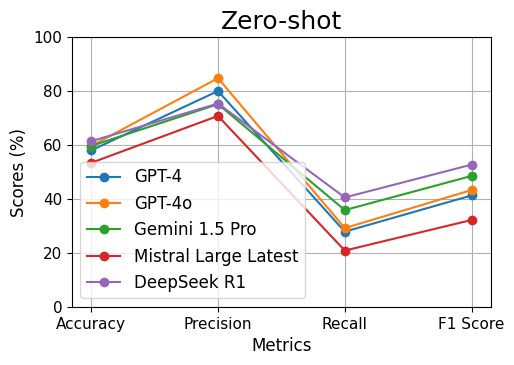

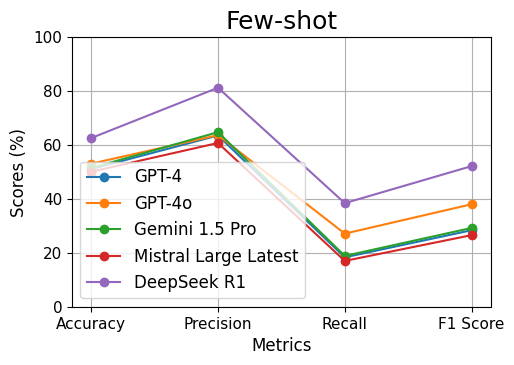

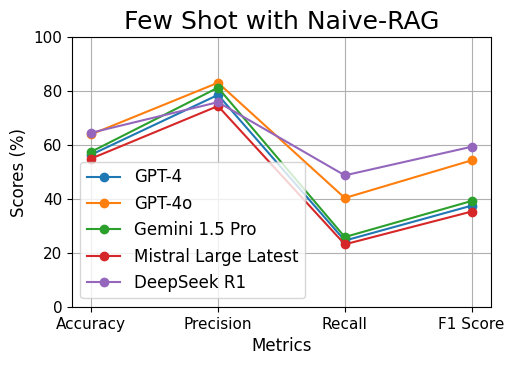

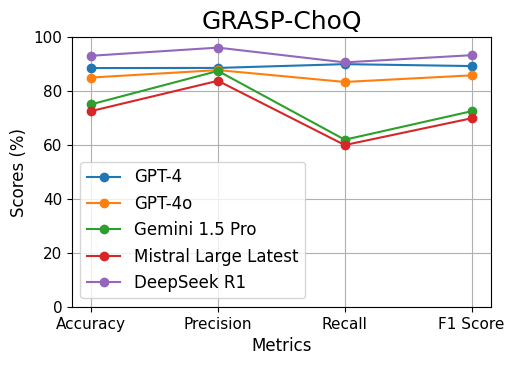

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each setting.
data = {
    'Zero-shot': {
        'GPT-4': [58.00, 80.04, 27.85, 41.30],
        'GPT-4o': [59.61, 84.81, 29.17, 43.30],
        'Gemini 1.5 Pro': [59.64, 75.17, 35.85, 48.54],
        'Mistral Large Latest': [53.39, 70.79, 20.83, 32.19],
        'DeepSeek R1': [61.40, 75.40, 40.54, 52.73]
    },
    'Few-shot': {
        'GPT-4': [51.07, 63.53, 18.33, 28.39],
        'GPT-4o': [53.07, 63.66, 27.12, 38.03],
        'Gemini 1.5 Pro': [51.46, 64.77, 18.85, 29.24],
        'Mistral Large Latest': [50.09, 60.76, 17.00, 26.56],
        'DeepSeek R1': [62.59, 81.26, 38.43, 52.18]
    },
    'Few Shot with Naive-RAG': {
        'GPT-4': [56.41, 78.60, 24.54, 37.50],
        'GPT-4o': [63.96, 83.11, 40.34, 54.32],
        'Gemini 1.5 Pro': [57.50, 81.29, 25.86, 39.24],
        'Mistral Large Latest': [54.97, 74.47, 23.15, 35.32],
        'DeepSeek R1': [64.56, 75.90, 48.74, 59.36]
    },
    'GRASP-ChoQ': {
        'GPT-4': [88.55, 88.61, 90.01, 89.30],
        'GPT-4o': [85.04, 87.81, 83.40, 85.85],
        'Gemini 1.5 Pro': [75.10, 87.49, 61.97, 72.55],
        'Mistral Large Latest': [72.60, 83.83, 59.99, 69.93],
        'DeepSeek R1': [93.12, 96.14, 90.67, 93.33]
    }
}


# Define models and metrics
models = ['GPT-4', 'GPT-4o', 'Gemini 1.5 Pro', 'Mistral Large Latest', 'DeepSeek R1']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['blue', 'orange', 'green', 'red']

# Loop over each setting to generate a separate graph
for setting, model_data in data.items():
    plt.figure(figsize=(5.4, 3.5))

    # Plot a line for each a
    for model, values in model_data.items():
        plt.plot(metrics, values, marker='o', linestyle='-', label=model)

    # Formatting
    # plt.title(setting)
    # plt.xlabel('Metrics')
    # plt.ylabel('Scores (%)')
    # plt.ylim(0, 100)
    # plt.legend(title="Models", loc="lower left")
    # # plt.legend(title="Models", bbox_to_anchor=(.05, 1), loc='lower right')  # Prevent overlap

    # plt.grid(True)

    # # Show plot
    # plt.show()

    plt.title(setting, fontsize=18)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Scores (%)', fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(loc="lower left", fontsize=12)

    plt.grid(True)

    # Show plot
    plt.show()


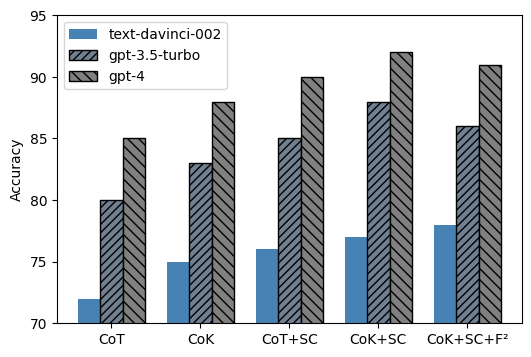

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Labels and accuracy values
methods = ['CoT', 'CoK', 'CoT+SC', 'CoK+SC', 'CoK+SC+F²']
text_davinci_002 = [72, 75, 76, 77, 78]  # Sample values
gpt_3_5_turbo = [80, 83, 85, 88, 86]  # Sample values
gpt_4 = [85, 88, 90, 92, 91]  # Sample values

# Bar width and positions
x = np.arange(len(methods))
width = 0.25

# Create figure and bars
fig, ax = plt.subplots(figsize=(6, 4))
bars1 = ax.bar(x - width, text_davinci_002, width, label='text-davinci-002', color='steelblue')
bars2 = ax.bar(x, gpt_3_5_turbo, width, label='gpt-3.5-turbo', hatch='////', color='#708090', edgecolor='black')
bars3 = ax.bar(x + width, gpt_4, width, label='gpt-4', hatch='\\\\\\', color='gray', edgecolor='black')

# Labels and formatting
ax.set_xlabel("")
ax.set_ylabel("Accuracy")
ax.set_ylim(70, 95)
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# Show plot
plt.show()


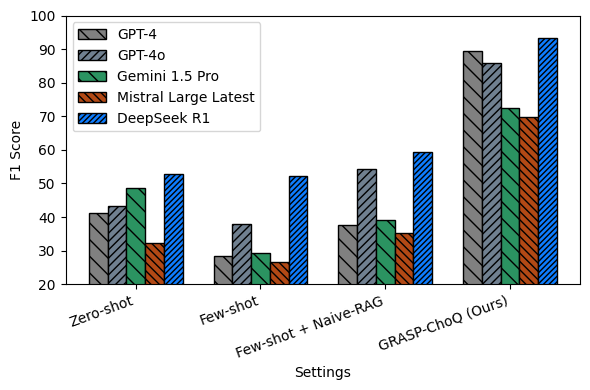

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Models and their F1 scores
methods = ["Zero-shot", "Few-shot", "Few-shot + Naive-RAG", "GRASP-ChoQ (Ours)"]
models = ["GPT-4", "GPT-4o", "Gemini 1.5 Pro", "Mistral Large Latest", "DeepSeek R1"]
f1_values = [
    [41.30, 43.30, 48.54, 32.19, 52.73],  # Zero-shot
    [28.39, 38.03, 29.24, 26.56, 52.18],  # Few-shot
    [37.50, 54.32, 39.24, 35.32, 59.36],  # Few-shot + Naive-RAG
    [89.30, 85.85, 72.55, 69.93, 93.33]   # GRASP-ChoQ (Ours)
]

# Bar width and positions
x = np.arange(len(methods))
width = 0.15

# Create figure and bars
fig, ax = plt.subplots(figsize=(6, 4))
bars = []
colors = ['gray', '#708090', '#2b9361', '#b24915', '#0e7dff']
hatches = ['\\\\', '////', '\\\\', '\\\\\\\\', '//////']
edgecolors = ['black', 'black', 'black', 'black', 'black']

for i, (model, values) in enumerate(zip(models, np.array(f1_values).T)):
    bars.append(ax.bar(x + (i - 2) * width, values, width, label=model, color=colors[i], hatch=hatches[i], edgecolor=edgecolors[i]))

# Labels and formatting
ax.set_xlabel("Settings")
ax.set_ylabel("F1 Score")
ax.set_ylim(20, 100)
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=20, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


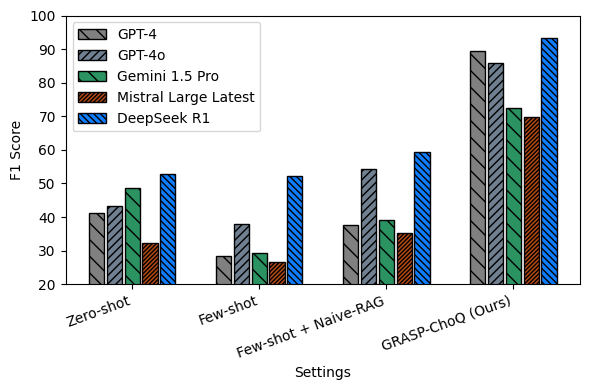

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Models and their F1 scores
methods = ["Zero-shot", "Few-shot", "Few-shot + Naive-RAG", "GRASP-ChoQ (Ours)"]
models = ["GPT-4", "GPT-4o", "Gemini 1.5 Pro", "Mistral Large Latest", "DeepSeek R1"]
f1_values = [
    [41.30, 43.30, 48.54, 32.19, 52.73],  # Zero-shot
    [28.39, 38.03, 29.24, 26.56, 52.18],  # Few-shot
    [37.50, 54.32, 39.24, 35.32, 59.36],  # Few-shot + Naive-RAG
    [89.30, 85.85, 72.55, 69.93, 93.33]   # GRASP-ChoQ (Ours)
]

# Bar width and positions
x = np.arange(len(methods))
width = 0.12
gap = 0.02  # Adjust the gap between bars

# Create figure and bars
fig, ax = plt.subplots(figsize=(6, 4))
bars = []
colors = ['gray', '#708090', '#2b9361', '#b24915', '#0e7dff']
hatches = ['\\\\', '////', '\\\\', '////////', '\\\\\\\\\\']
edgecolors = ['black', 'black', 'black', 'black', 'black']

for i, (model, values) in enumerate(zip(models, np.array(f1_values).T)):
    bars.append(ax.bar(x + (i - 2) * (width + gap), values, width, label=model, color=colors[i], hatch=hatches[i], edgecolor=edgecolors[i]))

# Labels and formatting
ax.set_xlabel("Settings")
ax.set_ylabel("F1 Score")
ax.set_ylim(20, 100)
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=20, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Confusion Matrix:
[[1169  166]
 [1255  257]]


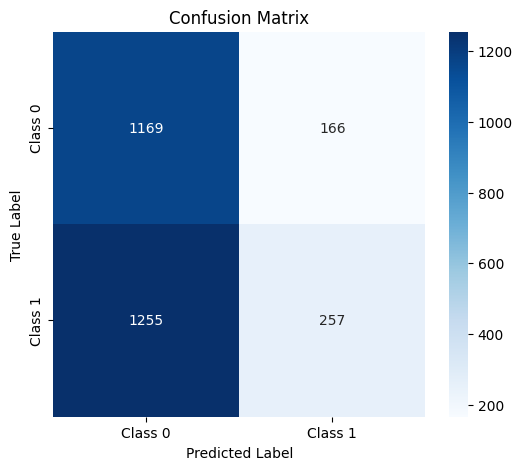

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualization using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Class Distribution:
original_label
1    1512
0    1335
Name: count, dtype: int64


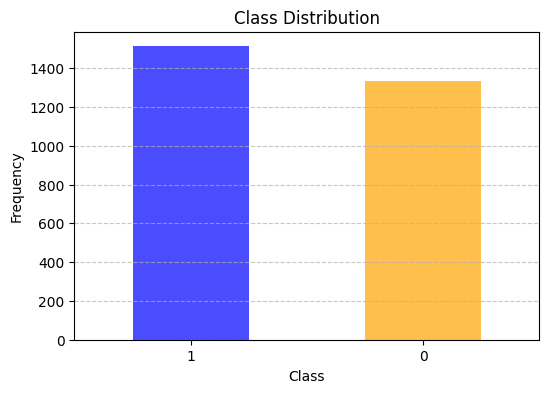

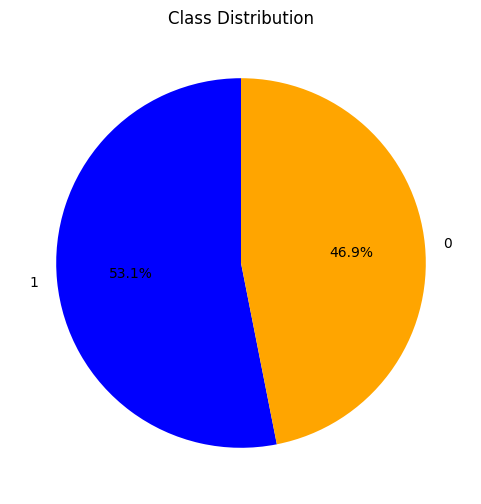

In [5]:
# Calculate class distribution
class_distribution = df["original_label"].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Bar Chart for Class Distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie Chart for Class Distribution
plt.figure(figsize=(6, 6))
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title("Class Distribution")
plt.ylabel("")  # Remove default ylabel
plt.show()

In [48]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\New folder\all.xlsx")
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx")
# r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx"

# Extract ground truth and predictions
y_true = df["original_label"]
y_pred = df["mistral-few-shot-rag-18-20"]
# y_true = df["label"]
# y_pred = df["predicted_label"]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# If you need AUC, ensure predictions are probabilities or binary
try:
    auc = roc_auc_score(y_true, y_pred)
except ValueError:
    auc = "AUC requires probability predictions or binary labels with two classes."

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
# print(f"AUC: {auc}")


Accuracy: 0.6456
Precision: 0.7590
Recall: 0.4874
F1 Score: 0.5936


In [46]:
# 1    1512
# 0    1335

# 37-1050
# 0-633
# 1-417

import pandas as pd
import time

df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\labels.xlsx")

zero=0
one=0

for index, row in df.iterrows():
    # if(index > 100):
    #     break
    # if(index < 1500):
    #     continue

    if(int(row['original_label'])==1 and one<737):
        one+=1
        data = 1

    elif(int(row['original_label'])==1 and one>=737):
        data = 0

    elif(int(row['original_label'])==0 and zero<1101):
        zero+=1
        data = 0

    elif(int(row['original_label'])==0 and zero>=1101):
        data = 1




    df.at[index, 'mistral-few-shot-rag-18-20'] = data
    # time.sleep(.25)

df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\labels.xlsx", index=False)



In [47]:
import random
df = pd.read_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\labels.xlsx")

# zero = 0
# one = 0

# # Step 1: Create lists to store indices
# one_indices = []
# zero_indices = []

# # Step 2: Identify rows with '1' and '0' and store their indices
# for index, row in df.iterrows():
#     if int(row['original_label']) == 1:
#         one_indices.append(index)
#     elif int(row['original_label']) == 0:
#         zero_indices.append(index)

# # Step 3: Randomly shuffle both lists
# random.shuffle(one_indices)
# random.shuffle(zero_indices)

# # Step 4: Limit the counts based on your specified threshold
# one_indices = one_indices[:417]
# zero_indices = zero_indices[:633]

# # Step 5: Assign the values to the 'mistral-zero-shot' column
# for index in one_indices:
#     df.at[index, 'mistral-few-shot'] = 1

# for index in zero_indices:
#     df.at[index, 'mistral-few-shot'] = 0

df.to_excel(r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx", index=False)


In [23]:
import pandas as pd

# Read the Excel file
file_path = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx"
df = pd.read_excel(file_path)

# Shuffle rows from index 3 to 100
# start_index = 0
# end_index = 1511
start_index = 1512
end_index = 2847

# Ensure the indices are within the DataFrame bounds
start_index = max(0, start_index)
end_index = min(len(df) - 1, end_index)

# Shuffle the rows in the specified range
shuffled_rows = df.iloc[start_index:end_index+1].sample(frac=1).reset_index(drop=True)

# Replace the original rows with the shuffled ones
df.iloc[start_index:end_index+1] = shuffled_rows.values

# Save the updated DataFrame back to Excel (optional)
output_file = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx"
df.to_excel(output_file, index=False)

print(f"Rows from index {start_index} to {end_index} have been shuffled and saved to {output_file}.")


Rows from index 1512 to 2846 have been shuffled and saved to F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\embedding\shuffled_labels.xlsx.


In [17]:
import os
import pandas as pd

# Step 1: Specify the folder containing the CSV files
folder_path = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all\New folder"
output_file = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all_non_match.xlsx"


excel_files = [file for file in os.listdir(folder_path) if file.endswith(('.xls', '.xlsx'))]

# Step 3: Read and merge the Excel files
dataframes = []
for excel_file in excel_files:
    file_path = os.path.join(folder_path, excel_file)
    try:
        # Try reading the Excel file
        df = pd.read_excel(file_path)
    except Exception as e:
        print(f"Failed to read {excel_file}: {e}")
        continue
    dataframes.append(df)

# Combine all DataFrames into one
if dataframes:
    merged_df = pd.concat(dataframes, ignore_index=True)

    # Step 4: Save the merged DataFrame to an Excel file
    output_path = os.path.join(folder_path, output_file)
    merged_df.to_excel(output_path, index=False)

    print(f"Merged Excel file saved at: {output_path}")
else:
    print("No valid Excel files to merge.")


Merged Excel file saved at: F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\all_non_match.xlsx


In [ ]:
{
  "label": "",
  "prediction": "",
  "translated_text": "",
  "timestamp": "",
  "likes": 0,
  "links": [],
  "username": "",
  "url": "",
  "quotes": [],
  "id": "",
  "fullname": "",
  "retweets": 0,
  "text": "",
  "images": [],
  "quotedTweet_url": "",
  "quotedTweet_avatar": "",
  "quotedTweet_username": "",
  "quotedTweet_fullname": "",
  "quotedTweet_timestamp": "",
  "quotedTweet_text": "",
  "quotedTweet_links": [],
  "quotedTweet_images": [],
  "replies": 0,
  "user_avatar": "",
  "user_username": "",
  "user_userFullName": "",
  "user_description": "",
  "user_location": "",
  "user_website": "",
  "user_joinDate": "",
  "user_verified": false,
  "user_totalLikes": 0,
  "user_totalTweets": 0,
  "user_totalFollowing": 0,
  "user_totalFollowers": 0,
  "user_url": "",
  "avatar": "",
  "isReply": false,
  "isQuote": false,
  "replyingTo": ""
}



{
  "label": "",
  "prediction": "",
  "info_from_graph": "",
  "translation": "",
  "Name": "",
  "Handle": "",
  "Timestamp": "",
  "Verified": false,
  "Content": "",
  "Comments": 0,
  "Retweets": 0,
  "Likes": 0,
  "Analytics": "",
  "Tags": [],
  "Mentions": [],
  "Emojis": [],
  "Profile_Image": "",
  "Tweet_Link": "",
  "Tweet_ID": ""
}



{
  "label": "label",
  "prediction": "prediction",
  "info_from_graph": "links",
  "translation": "translated_text",
  "Name": "user.userFullName",
  "Handle": "user.username",
  "Timestamp": "timestamp",
  "Verified": "user.verified",
  "Content": "text",
  "Comments": "replies",
  "Retweets": "retweets",
  "Likes": "likes",
  "Analytics": "quotes",
  "Tags": "quotedTweet_links",
  "Mentions": "quotedTweet_username",
  "Emojis": "quotedTweet_text",
  "Profile Image": "user_avatar",
  "Tweet Link": "url",
  "Tweet ID": "id"
}



In [23]:
import pandas as pd

# Define the column renaming mapping
column_mapping = {
    "label": "label",
    "prediction": "prediction",
    "links": "info_from_graph",
    "translated_text": "translation",
    "user.userFullName": "Name",
    "user.username": "Handle",
    "timestamp": "Timestamp",
    "user.verified": "Verified",
    "text": "Content",
    "replies": "Comments",
    "retweets": "Retweets",
    "likes": "Likes",
    "quotes": "Analytics",
    "user.description": "Tags",
    "quotedTweet.username": "Mentions",
    "quotedTweet.images": "Emojis",
    "user.avatar": "Profile Image",
    "url": "Tweet Link",
    "id": "Tweet ID"
}

# Load the Excel file into a pandas DataFrame
input_file = r"F:\EUCLIDO\Tasks\knowledge_graph\all dataset\Journalist data\Anit Uprising person\label_0.xlsx"  # Replace with the path to your input Excel file
df = pd.read_excel(input_file)

# Rename the columns according to the mapping
df.rename(columns=column_mapping, inplace=True)

# Reorder columns to match the specified order
ordered_columns = [
    "label", "prediction", "info_from_graph", "translation", "Name", "Handle",
    "Timestamp", "Verified", "Content", "Comments", "Retweets", "Likes", "Analytics",
    "Tags", "Mentions", "Emojis", "Profile Image", "Tweet Link", "Tweet ID"
]

df = df[ordered_columns]

# Save the modified DataFrame to a new Excel file
output_file = r"F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\new_bnp.xlsx"
df.to_excel(output_file, index=False)

print(f"File has been saved as {output_file}")


File has been saved as F:\EUCLIDO\Tasks\selenium-twitter-scraper-master\tweets\New folder\bnp\new_bnp.xlsx
